In [63]:
import pandas as pd
pd.set_option('display.max_columns', None)

import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15,8)})

path_to_catalog=r'C:\Users\kgrzebien\Desktop\python_tasks\ecommerce\ecommerce_mateusz\\'

In [2]:
df=pd.read_excel('20220808 KPI SI do Lipca 2022.xlsx',
                sheet_name='dane_sesje')

In [3]:
df

,Okres II,Okres,ROK,MIES,Firma,Wartość
0,2018-06-01,2018_06,2018,6,4home.pl,NaN
1,2018-06-01,2018_06,2018,6,alena-firany.pl,NaN
2,2018-06-01,2018_06,2018,6,dekoria.pl,260000.0
3,2018-06-01,2018_06,2018,6,Eurofirany (Sesje GA),170000.0
4,2018-06-01,2018_06,2018,6,Eurofirany (Similar),NaN
...,...,...,...,...,...,...
1114,2022-07-01,2022_07,2022,7,tekstylialand.pl,NaN
1115,2022-07-01,2022_07,2022,7,tkaniny.net,41000.0
1116,2022-07-01,2022_07,2022,7,westwing.pl,365900.0
1117,2022-07-01,2022_07,2022,7,westwingnow.pl,267500.0


In [6]:
df.groupby(['Firma']).agg({'Wartość':'sum'}).sort_values(by='Wartość', ascending=False)

,Wartość
Firma,
bonprix.de,76400000.0
home-you.com,64657500.0
Eurofirany (Sesje GA),34090762.0
westwing.pl,33771580.0
bonprix.fr,26800000.0
bonprix.pl,23100000.0
bonprix.nl,22700000.0
bonprix.it,22400000.0
bonprix.ru,20257900.0


In [7]:
df.columns

Index(['Okres II', 'Okres', 'ROK', 'MIES', 'Firma', 'Wartość'], dtype='object')

In [95]:
df_=df.loc[~df['Firma'].str.contains('bonprix')].loc[~((df['Firma'].str.contains('bonami'))&(~df['Firma'].str.contains('.pl')))].\
        loc[~df['Firma'].isin(['Eurofirany (Similar)','Eurofirany (Użytkow. GA)'])]

In [26]:
df_

,Okres II,Okres,ROK,MIES,Firma,Wartość
0,2018-06-01,2018_06,2018,6,4home.pl,NaN
1,2018-06-01,2018_06,2018,6,alena-firany.pl,NaN
2,2018-06-01,2018_06,2018,6,dekoria.pl,260000.0
3,2018-06-01,2018_06,2018,6,Eurofirany (Sesje GA),170000.0
6,2018-06-01,2018_06,2018,6,home-you.com,930000.0
...,...,...,...,...,...,...
1114,2022-07-01,2022_07,2022,7,tekstylialand.pl,NaN
1115,2022-07-01,2022_07,2022,7,tkaniny.net,41000.0
1116,2022-07-01,2022_07,2022,7,westwing.pl,365900.0
1117,2022-07-01,2022_07,2022,7,westwingnow.pl,267500.0


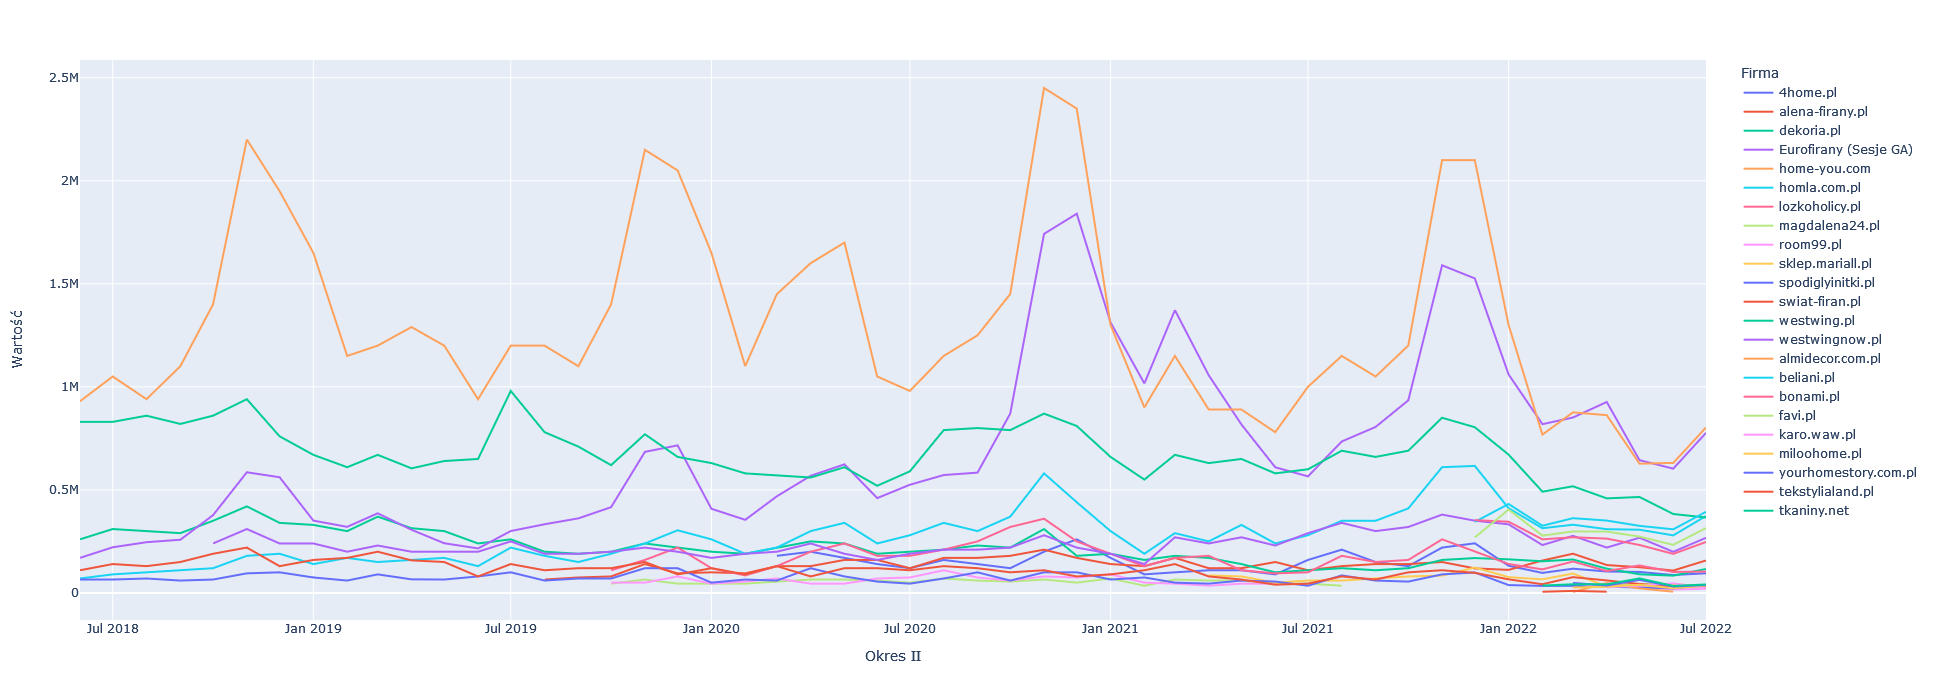

In [27]:
px.line(df_,
       x='Okres II',
       y='Wartość',
       color='Firma',
       height=700)

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

def func_trend_season(df, company_name, plot):
    df=df.loc[df['Firma']==company_name]
    df.index=pd.date_range(start=str(df['Okres II'].min()), end=str(df['Okres II'].max()), freq='MS', inclusive="both")
    
    df=df.loc[df['Wartość'].notnull()]
    
    decompose_result_mult = seasonal_decompose(df[['Wartość']], model='additive')#multiplicative

    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid

    
    if plot=='print':
        decompose_result_mult.plot()
        plt.show()
    
    df_return=pd.DataFrame()
    df_return['month']=df.index
    df_return['trend']=np.array(trend)
    df_return['trend_norm']=np.array(trend)/np.nanmean(np.array(df['Wartość']))
    df_return['seasonal']=np.array(seasonal)
    df_return['seasonal_norm']=np.array(seasonal)/np.nanmean(np.array(df['Wartość']))
    df_return['Firma']=company_name
    
    return df_return

In [145]:
df_trend=pd.DataFrame()
for i in tqdm(df_['Firma'].unique()):
    try:
        df_trend=df_trend.append(func_trend_season(df_, i, 'nprint'),
                                 ignore_index=True)
    except:
        print(i)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 91.47it/s]

magdalena24.pl
room99.pl
sklep.mariall.pl
almidecor.com.pl
beliani.pl
bonami.pl
favi.pl
karo.waw.pl
miloohome.pl
yourhomestory.com.pl
tekstylialand.pl
tkaniny.net


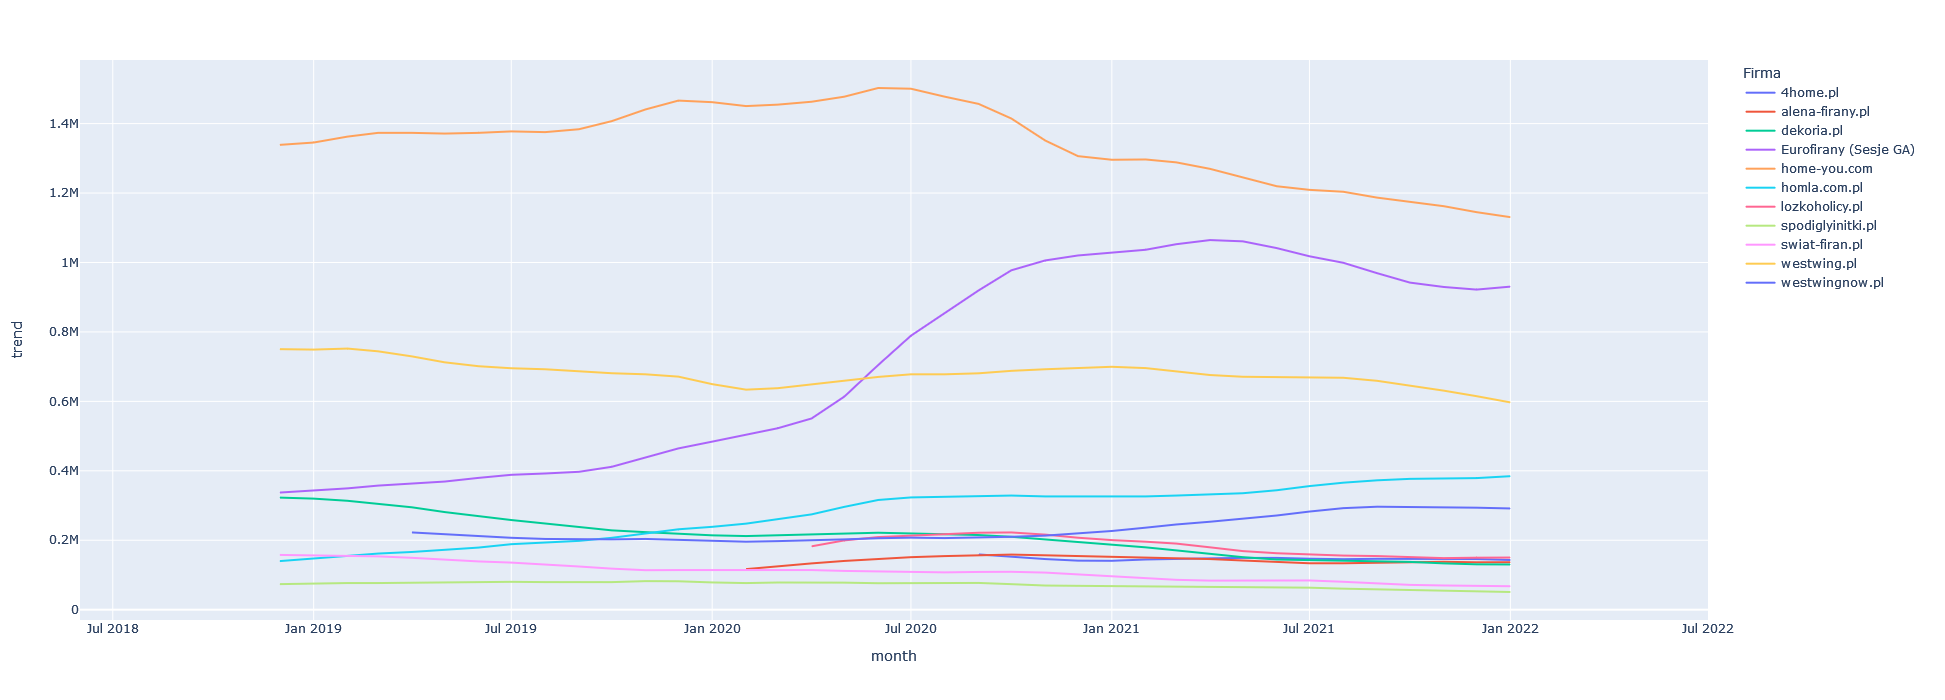

In [132]:
px.line(df_trend,
        x='month',
        y='trend',
        color='Firma',
       height=700)

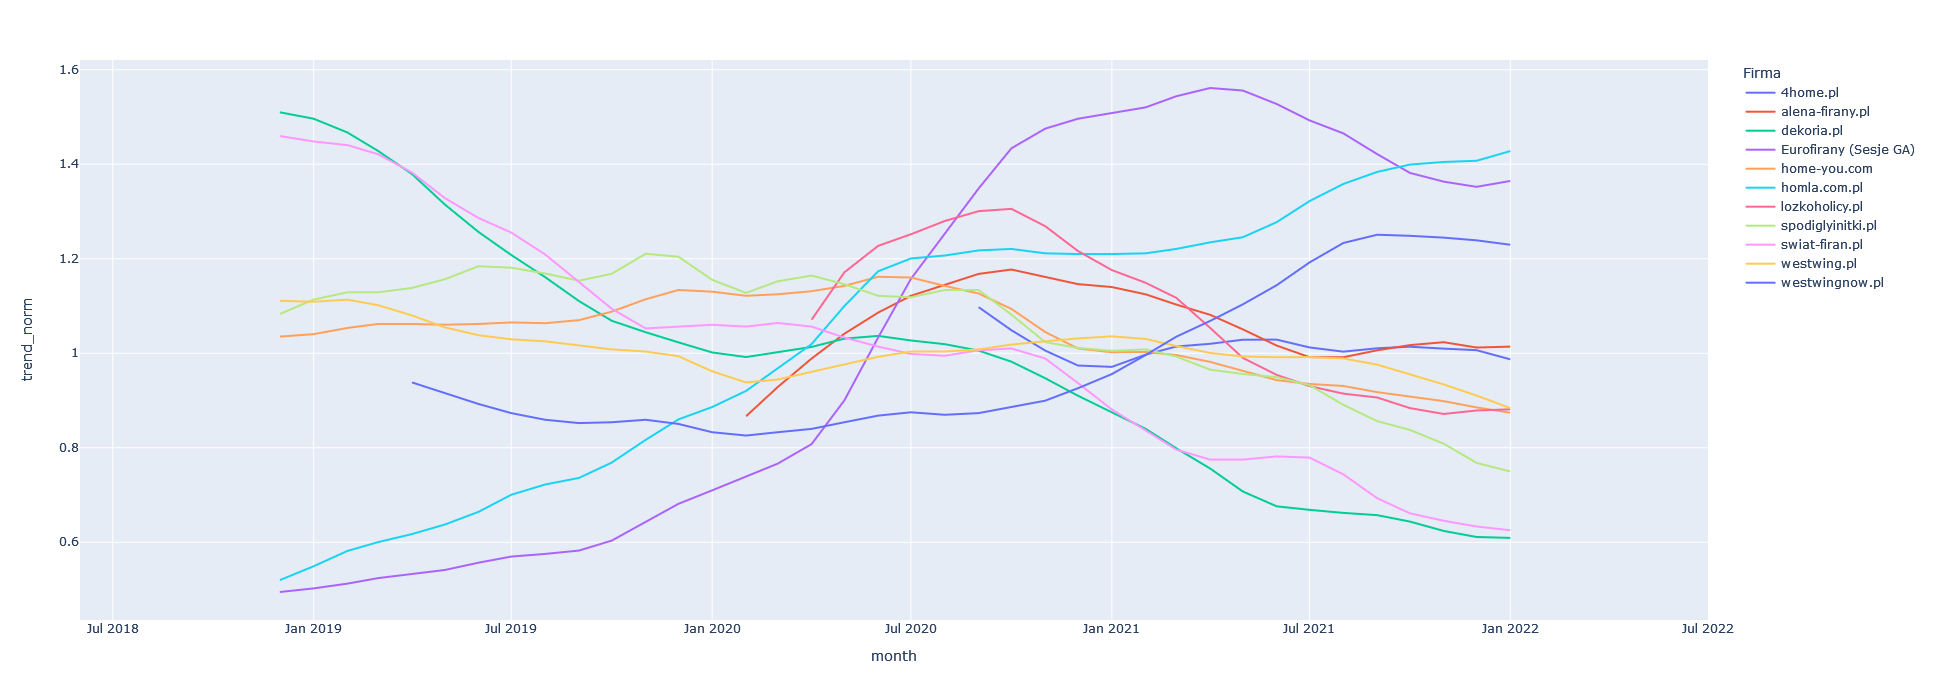

In [146]:
px.line(df_trend,
        x='month',
        y='trend_norm',
        color='Firma',
       height=700)

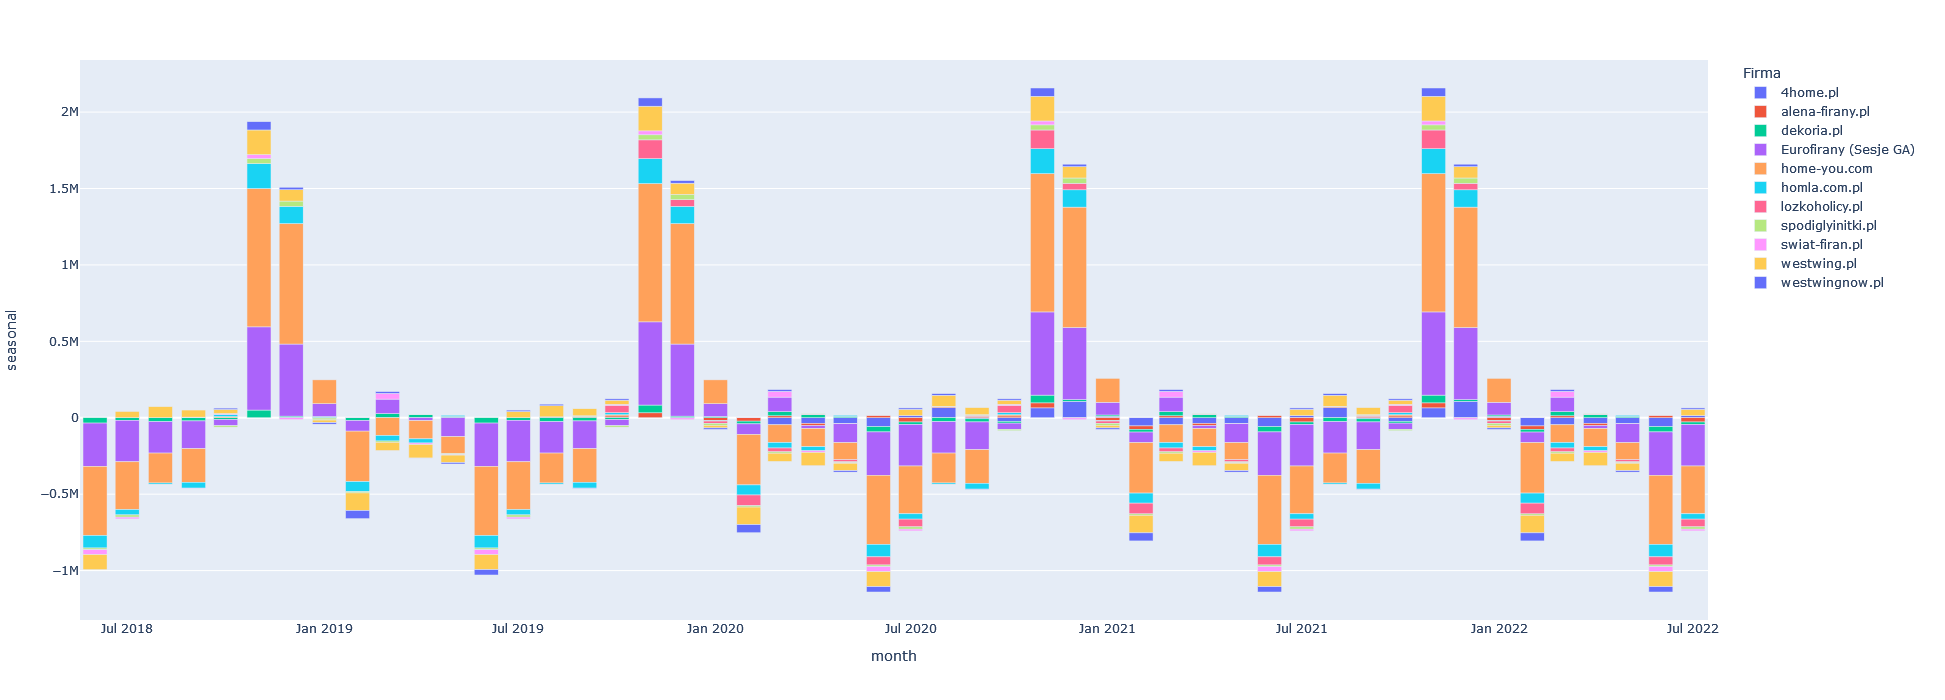

In [129]:
px.bar(df_trend,
        x='month',
        y='seasonal',
        color='Firma',
       height=700)

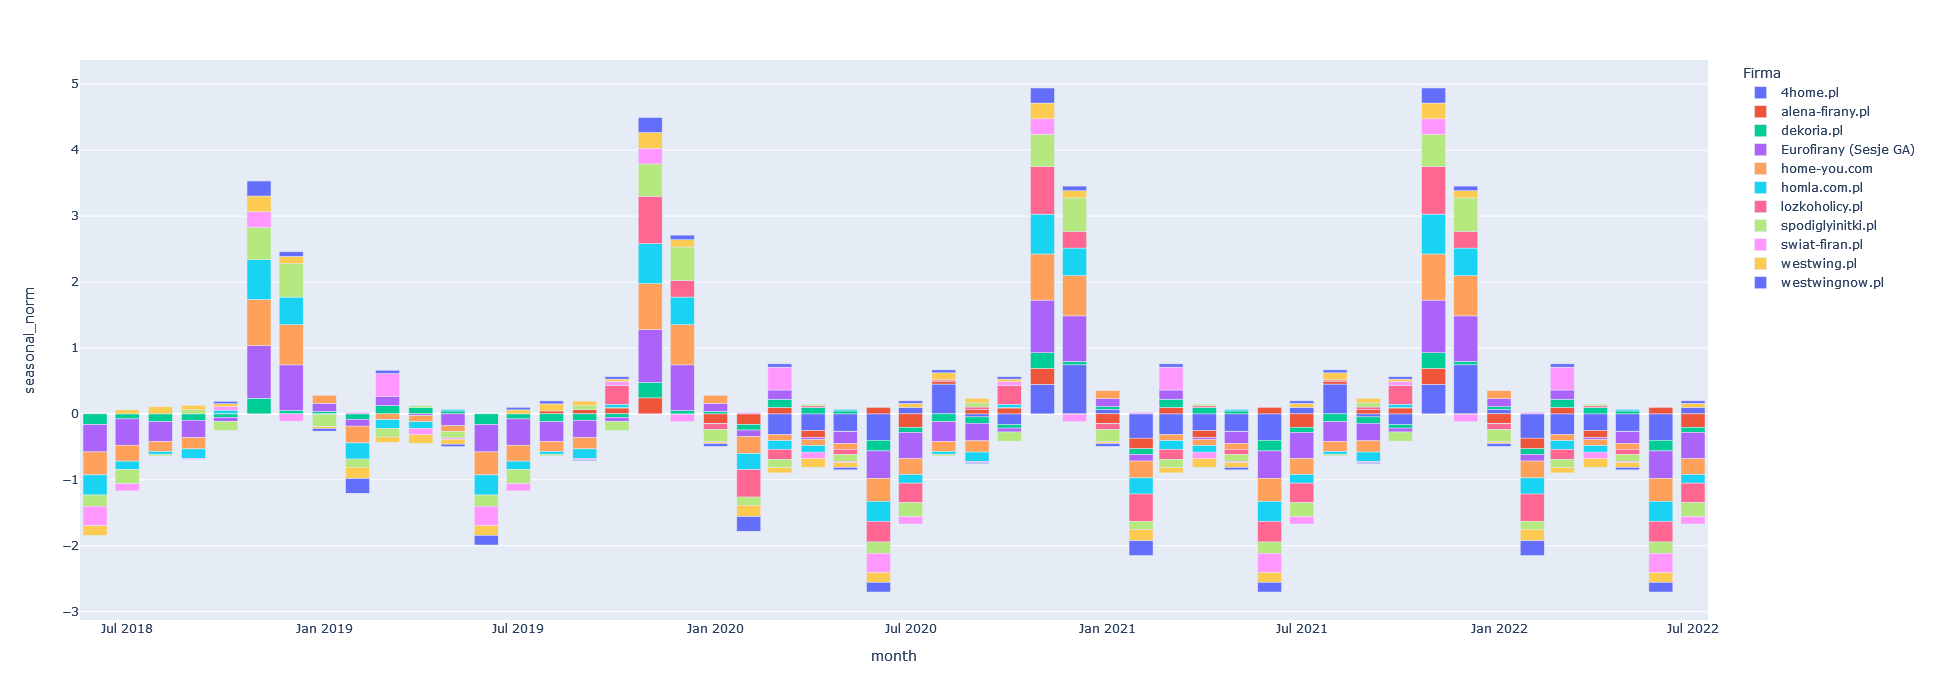

In [147]:
px.bar(df_trend,
        x='month',
        y='seasonal_norm',
        color='Firma',
       height=700)